In [50]:
import pandas as pd
import os
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


### Data Preparation

In [17]:
companies = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Create an empty DataFrame to store combined data
combined_stock_data = pd.DataFrame()

# Loop through each file, load it, and append it to the combined DataFrame
for company in companies:
    file_path = f'../Data/yfinance_data/{company}_historical_data.csv'  # File path for each company's CSV
    if os.path.exists(file_path):  # Check if the file exists
        temp_df = pd.read_csv(file_path)
        temp_df['company'] = company  # Add a 'company' column to identify which company it is
        combined_stock_data = pd.concat([combined_stock_data, temp_df], ignore_index=True)
    else:
        print(f"File not found: {file_path}")

# Check the combined DataFrame
combined_stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [18]:
news_df = pd.read_csv('../Data/cleaned_financial_news.csv')

In [19]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407327 entries, 0 to 1407326
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   headline         1407327 non-null  object
 1   url              1407327 non-null  object
 2   publisher        1407327 non-null  object
 3   date             1407327 non-null  object
 4   stock            1407327 non-null  object
 5   headline_length  1407327 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [27]:
combined_stock_data.head()

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [20]:
relevant_news_df = news_df[news_df['stock'].isin(companies)]
relevant_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6939 entries, 6680 to 1257094
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   headline         6939 non-null   object
 1   url              6939 non-null   object
 2   publisher        6939 non-null   object
 3   date             6939 non-null   object
 4   stock            6939 non-null   object
 5   headline_length  6939 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 379.5+ KB


In [21]:
combined_stock_data['Date'] = pd.to_datetime(combined_stock_data['Date'])
combined_stock_data = combined_stock_data.rename(columns={'Date': 'date'})
combined_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          45428 non-null  datetime64[ns]
 1   Open          45428 non-null  float64       
 2   High          45428 non-null  float64       
 3   Low           45428 non-null  float64       
 4   Close         45428 non-null  float64       
 5   Adj Close     45428 non-null  float64       
 6   Volume        45428 non-null  int64         
 7   Dividends     45428 non-null  float64       
 8   Stock Splits  45428 non-null  float64       
 9   company       45428 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.5+ MB


### Sentiment Analysis 

In [23]:
# Define a function to calculate sentiment scores
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Apply sentiment analysis to relevant news headlines
relevant_news_df.loc[:, 'sentiment_score'] = relevant_news_df['headline'].apply(get_sentiment)

# Preview the updated relevant news dataset
print(relevant_news_df.head())

                                               headline  \
6680  Tech Stocks And FAANGS Strong Again To Start D...   
6681      10 Biggest Price Target Changes For Wednesday   
6682  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684  Apple To Let Users Trade In Their Mac Computer...   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

                           date stock  headline_length  sentiment_score  
6680  2020-06-10 15:33:26+00:00  AAPL               69         0.433333  
6681  2020-06-10 12:14:08+00

### Aggregation

In [25]:
# Aggregate sentiment scores by date and company
daily_sentiment = relevant_news_df.groupby(['date', 'stock'])['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'avg_sentiment_score'}, inplace=True)

# Preview aggregated sentiment data
print(daily_sentiment.head())

                        date stock  avg_sentiment_score
0  2011-03-03 00:00:00+00:00  NVDA               -0.300
1  2011-03-07 00:00:00+00:00  NVDA               -0.125
2  2011-03-08 00:00:00+00:00  NVDA                0.000
3  2011-03-09 00:00:00+00:00  NVDA                0.000
4  2011-03-10 00:00:00+00:00  NVDA                0.500


In [30]:
# Filter stock data for relevant companies
relevant_companies = relevant_news_df['stock'].unique()
filtered_stock_data = combined_stock_data[combined_stock_data['company'].isin(relevant_companies)]

# Calculate daily stock returns for the filtered stock data
filtered_stock_data['daily_return'] = filtered_stock_data.groupby('company')['Close'].pct_change()

# Drop rows with NaN values (e.g., the first row for each company)
filtered_stock_data = filtered_stock_data.dropna()

# Preview the filtered stock data
print(filtered_stock_data.head())


        date      Open      High       Low     Close  Adj Close     Volume  \
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   

   Dividends  Stock Splits company  daily_return  
1        0.0           0.0    AAPL     -0.052171  
2        0.0           0.0    AAPL     -0.073398  
3        0.0           0.0    AAPL      0.024751  
4        0.0           0.0    AAPL      0.028992  
5        0.0           0.0    AAPL      0.061029  


C:\Users\Kalea\AppData\Local\Temp\ipykernel_2620\1935151278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stock_data['daily_return'] = filtered_stock_data.groupby('company')['Close'].pct_change()


### Merging

In [49]:
# relevant_news_df.rename(columns={'stock': 'company'}, inplace=True)
# daily_sentiment.rename(columns={'stock': 'company'}, inplace=True)
# daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# # Merge the filtered stock data with daily sentiment scores
merged_data = pd.merge(
    filtered_stock_data,
    daily_sentiment,
    on=['date', 'company'],
    how='inner'
)

# Preview the merged dataset
print(merged_data.head())



        date       Open       High        Low      Close  Adj Close  \
0 2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
1 2020-03-10  69.285004  71.610001  67.342499  71.334999  69.398438   
2 2020-03-11  69.347504  70.305000  67.964996  68.857498  66.988190   
3 2020-03-12  63.985001  67.500000  62.000000  62.057499  60.372791   
4 2020-03-13  66.222504  69.980003  63.237499  69.492500  67.605965   

      Volume  Dividends  Stock Splits company  daily_return  \
0  286744800        0.0           0.0    AAPL     -0.079092   
1  285290000        0.0           0.0    AAPL      0.072022   
2  255598800        0.0           0.0    AAPL     -0.034731   
3  418474000        0.0           0.0    AAPL     -0.098755   
4  370732000        0.0           0.0    AAPL      0.119808   

   avg_sentiment_score  
0            -0.155556  
1             0.021708  
2             0.018624  
3            -0.083048  
4             0.069215  


In [48]:
filtered_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32825 entries, 1 to 45427
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          32825 non-null  datetime64[ns]
 1   Open          32825 non-null  float64       
 2   High          32825 non-null  float64       
 3   Low           32825 non-null  float64       
 4   Close         32825 non-null  float64       
 5   Adj Close     32825 non-null  float64       
 6   Volume        32825 non-null  int64         
 7   Dividends     32825 non-null  float64       
 8   Stock Splits  32825 non-null  float64       
 9   company       32825 non-null  object        
 10  daily_return  32825 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 3.0+ MB


### Correlation Analysis

In [51]:
# Group by company and calculate the correlation for each company
correlation_results = {}

for company in merged_data['company'].unique():
    company_data = merged_data[merged_data['company'] == company]
    correlation, p_value = pearsonr(company_data['avg_sentiment_score'], company_data['daily_return'])
    correlation_results[company] = {
        'correlation': correlation,
        'p_value': p_value
    }

# Print the correlation results
for company, result in correlation_results.items():
    print(f"Company: {company}, Pearson Correlation: {result['correlation']}, P-value: {result['p_value']}")


Company: AAPL, Pearson Correlation: 0.17270074272129568, P-value: 0.15588745712878485
Company: AMZN, Pearson Correlation: 0.04934082070825336, P-value: 0.7750534997696303
Company: GOOG, Pearson Correlation: 0.05289152385396212, P-value: 0.3189835606946514
Company: NVDA, Pearson Correlation: 0.10326871082757967, P-value: 0.0005072773857806499
Company: TSLA, Pearson Correlation: 0.0644022649976208, P-value: 0.3214685174529317


### Visualization 

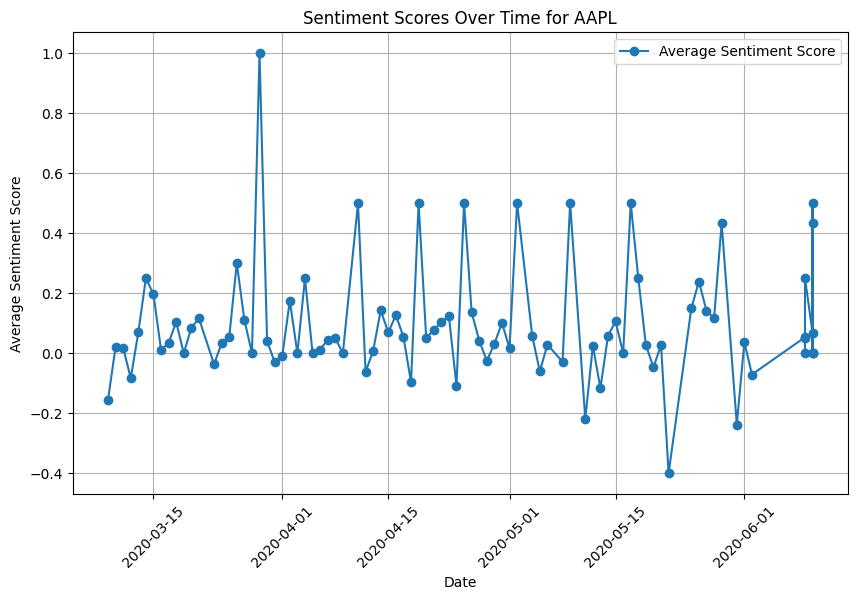

In [52]:
# Filter for a specific company (e.g., AAPL)
company = 'AAPL'
company_sentiment = daily_sentiment[daily_sentiment['company'] == company]

# Plot sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(company_sentiment['date'], company_sentiment['avg_sentiment_score'], marker='o', label='Average Sentiment Score')
plt.title(f'Sentiment Scores Over Time for {company}')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Sentiment Analysis

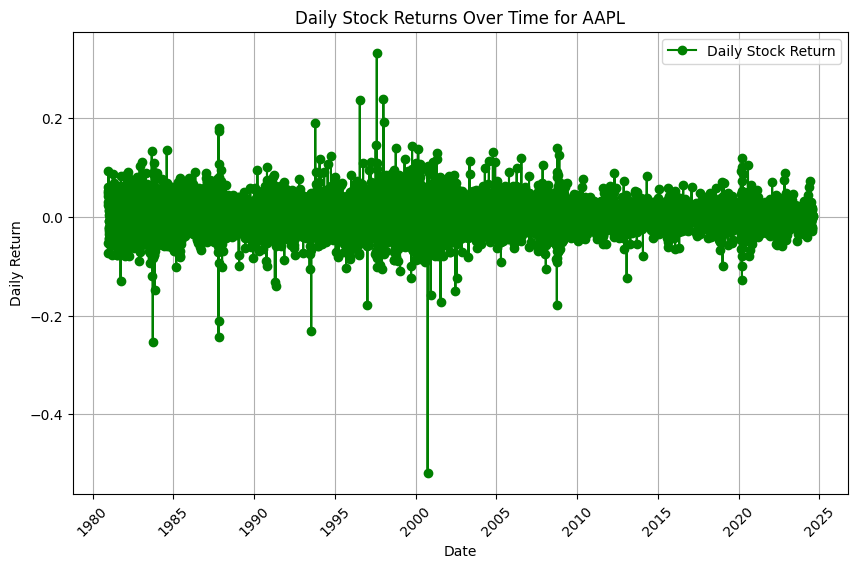

In [53]:
# Filter for the same company in stock data
company_stock = filtered_stock_data[filtered_stock_data['company'] == company]

# Plot daily returns over time
plt.figure(figsize=(10, 6))
plt.plot(company_stock['date'], company_stock['daily_return'], marker='o', color='green', label='Daily Stock Return')
plt.title(f'Daily Stock Returns Over Time for {company}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

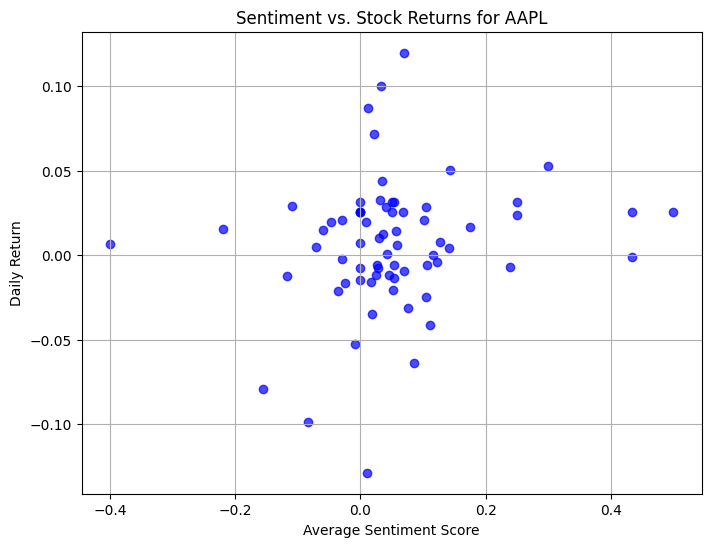

In [54]:
# Merge data for the specific company
company_merged = merged_data[merged_data['company'] == company]

# Scatter plot of sentiment vs. daily return
plt.figure(figsize=(8, 6))
plt.scatter(company_merged['avg_sentiment_score'], company_merged['daily_return'], alpha=0.7, color='blue')
plt.title(f'Sentiment vs. Stock Returns for {company}')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

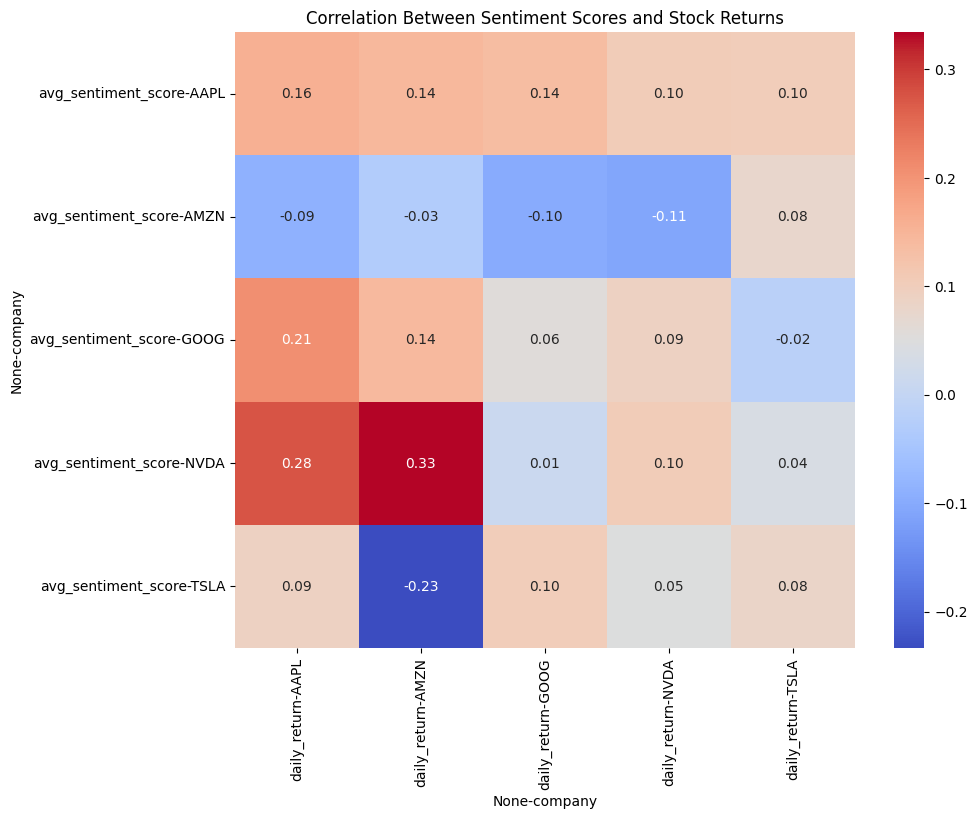

In [55]:

# Pivot the data to calculate correlations
correlation_data = merged_data.pivot_table(index='date', columns='company', values=['avg_sentiment_score', 'daily_return'])

# Calculate correlations between sentiment and stock returns
correlations = correlation_data.corr().iloc[:len(correlation_data.columns)//2, len(correlation_data.columns)//2:]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Sentiment Scores and Stock Returns')
plt.show()

### correlation anlysis

C:\Users\Kalea\AppData\Local\Temp\ipykernel_2620\1375862154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_sentiment['sentiment_moving_avg'] = company_sentiment['avg_sentiment_score'].rolling(window=7).mean()
C:\Users\Kalea\AppData\Local\Temp\ipykernel_2620\1375862154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_stock['price_moving_avg'] = company_stock['Close'].rolling(window=7).mean()


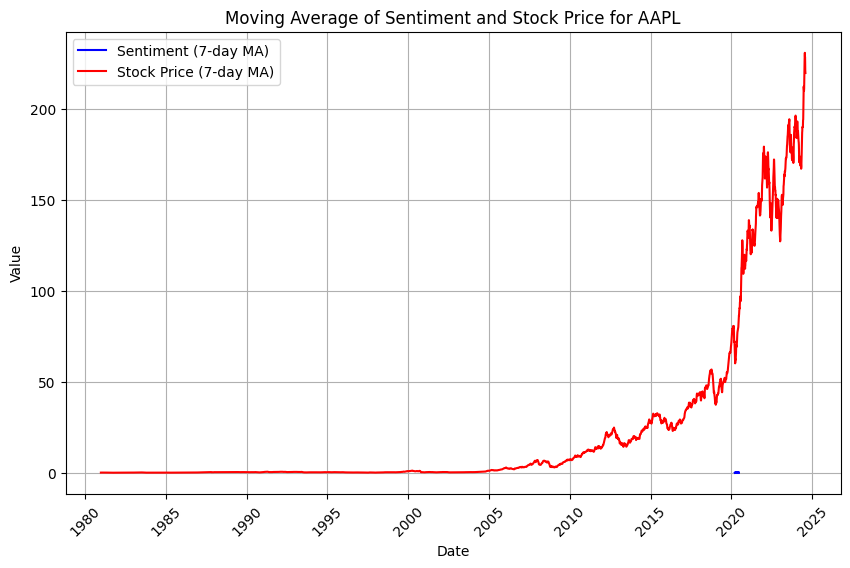

In [57]:

# Calculate 7-day moving averages for sentiment and closing price
company_sentiment['sentiment_moving_avg'] = company_sentiment['avg_sentiment_score'].rolling(window=7).mean()
company_stock['price_moving_avg'] = company_stock['Close'].rolling(window=7).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(company_sentiment['date'], company_sentiment['sentiment_moving_avg'], label='Sentiment (7-day MA)', color='blue')
plt.plot(company_stock['date'], company_stock['price_moving_avg'], label='Stock Price (7-day MA)', color='red')
plt.title(f'Moving Average of Sentiment and Stock Price for {company}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()